# Clasificación de figuras por medio de modelos de aprendizaje

___________________________________________________________________________________________________________________________________________________________________________________________

## Integrantes:
### Ceballos Castillo Rogelio - 74823
### Olvera Gómez Gerardo Yael

___________________________________________________________________________________________________________________________________________________________________________________________

## Importaciones

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## Modelo de aprendizaje Perceptrón Multicapa (MLP)

In [3]:

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('./Figuras_totales.csv') 

# Preprocesar los datos
le = LabelEncoder()
df['Figure type'] = le.fit_transform(df['Figure type'])

# Separar las características (X) y las etiquetas (y)
X = df[['  Extent', '  Solidity']].values
y = df['Figure type'].values

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de Perceptrón Multicapa (MLP)
model = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=350, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Perceptrón Multicapa en datos de prueba: {accuracy*100:.2f}%')



Precisión del modelo de Perceptrón Multicapa en datos de prueba: 100.00%


## Modelo de aprendizaje Regresión Logística

In [4]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('./Figuras_totales.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Preprocesar los datos
le = LabelEncoder()
df['Figure type'] = le.fit_transform(df['Figure type'])

# Separar las características (X) y las etiquetas (y)
X = df[['  Extent', '  Solidity']].values
y = df['Figure type'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(penalty='l2', max_iter=70)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Regresión Logística en datos de prueba: {accuracy*100:.2f}%')


Precisión del modelo de Regresión Logística en datos de prueba: 95.00%


## Comparación de ambos modelos por medio de la curva ROC

c:\Users\rogel\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


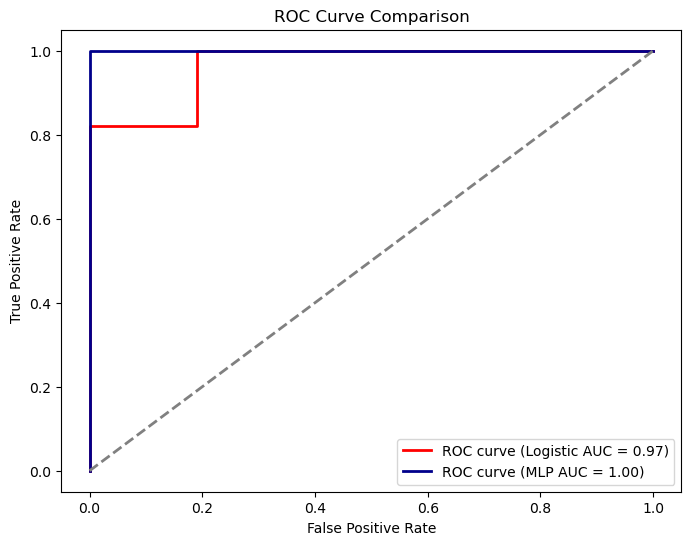

In [8]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('./Figuras_totales.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Preprocesar los datos
le = LabelEncoder()
df['Figure type'] = le.fit_transform(df['Figure type'])

# Separar las características (X) y las etiquetas (y)
X = df[['  Extent', '  Solidity']].values
y = df['Figure type'].values

# Dividir el conjunto de datos en entrenamiento y prueba para ambos modelos
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y, test_size=0.5, random_state=24)
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=0.5, random_state=42)  # Mismo tamaño que el conjunto de prueba para Regresión Logística

# Modelo de Regresión Logística
logistic_model = LogisticRegression(penalty='l2', max_iter=70)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Obtener las probabilidades de predicción para el modelo logístico
logistic_probs = logistic_model.predict_proba(X_test_logistic)

# Modelo de Perceptrón Multicapa (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=350, random_state=42)
mlp_model.fit(X_train_mlp, y_train_mlp)

# Obtener las probabilidades de predicción para el modelo MLP
mlp_probs = mlp_model.predict_proba(X_test_mlp)

# Convertir etiquetas multiclase a etiquetas binarias para ambos modelos
lb = LabelEncoder()
y_test_bin_logistic = lb.fit_transform(y_test_logistic)
y_test_bin_logistic = label_binarize(y_test_bin_logistic, classes=np.unique(y_test_bin_logistic))

y_test_bin_mlp = lb.fit_transform(y_test_mlp)
y_test_bin_mlp = label_binarize(y_test_bin_mlp, classes=np.unique(y_test_bin_mlp))

# Calcular la curva ROC para ambos modelos
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_bin_logistic.ravel(), logistic_probs.ravel())
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_bin_mlp[:, 1], mlp_probs[:, 1])

# Calcular el área bajo la curva (AUC) para ambos modelos
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Graficar las curvas ROC para ambos modelos
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='red', lw=2, label=f'ROC curve (Logistic AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='darkblue', lw=2, label=f'ROC curve (MLP AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Matrices de confusión para ambos modelos

### Regresión Logística

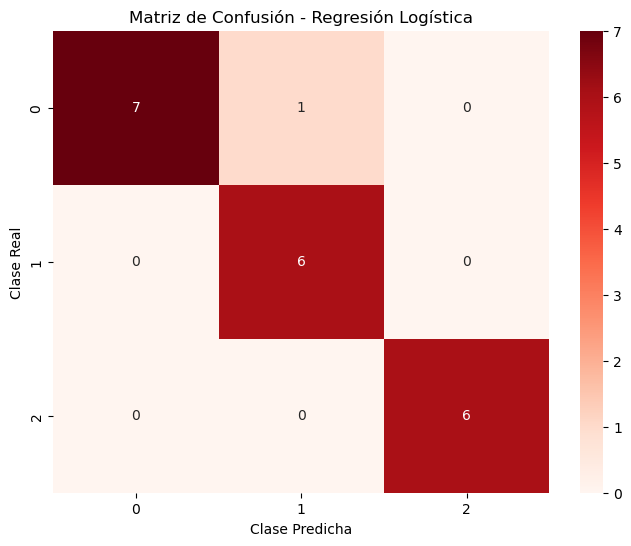

Precisión del modelo de Regresión Logística: 95.00%


In [5]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('./Figuras_totales.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Preprocesar los datos
le = LabelEncoder()
df['Figure type'] = le.fit_transform(df['Figure type'])

# Separar las características (X) y las etiquetas (y)
X = df[['  Extent', '  Solidity']].values
y = df['Figure type'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(penalty='l2', max_iter=70)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Regresión Logística: {accuracy*100:.2f}%')

### Perceptrón Multicapa

c:\Users\rogel\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


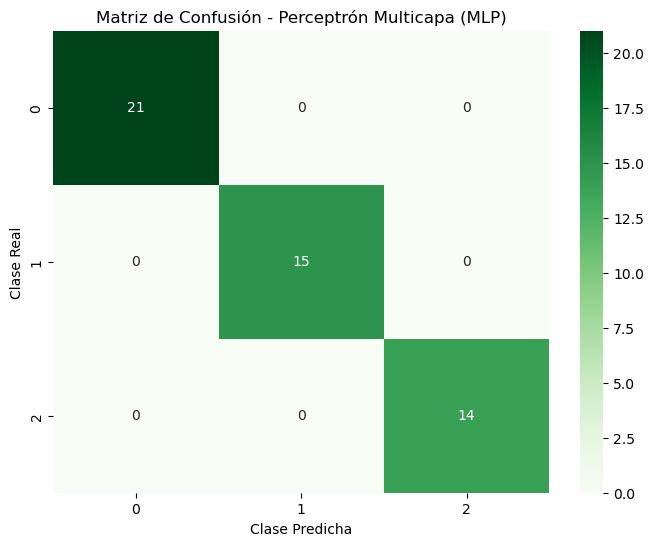

Precisión del modelo de Perceptrón Multicapa: 100.00%


In [8]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('./Figuras_totales.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Preprocesar los datos
le = LabelEncoder()
df['Figure type'] = le.fit_transform(df['Figure type'])

# Separar las características (X) y las etiquetas (y)
X = df[['  Extent', '  Solidity']].values
y = df['Figure type'].values

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de Perceptrón Multicapa (MLP)
model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=350, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Perceptrón Multicapa (MLP)')
plt.show()

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Perceptrón Multicapa: {accuracy*100:.2f}%')

## Funciones de prueba

In [5]:
def cargar_modelos():
    # Cargar el conjunto de datos desde un archivo CSV
    df = pd.read_csv('./Figuras_totales.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

    # Preprocesar los datos
    le = LabelEncoder()
    df['Figure type'] = le.fit_transform(df['Figure type'])

    # Separar las características (X) y las etiquetas (y)
    X = df[['  Extent', '  Solidity']].values
    y = df['Figure type'].values

    # Normalizar las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Dividir el conjunto de datos en entrenamiento y prueba para ambos modelos
    X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=0.2, random_state=42)  # Mismo tamaño que el conjunto de prueba para Regresión Logística

    # Crear y entrenar el modelo de Regresión Logística
    model_logistic = LogisticRegression(penalty='l2', max_iter=70)
    model_logistic.fit(X_train_logistic, y_train_logistic)

    # Crear y entrenar el modelo de Perceptrón Multicapa (MLP)
    model_mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=350, random_state=42)
    model_mlp.fit(X_train_mlp, y_train_mlp)

    return model_logistic, model_mlp, scaler, le

def predecir_figura(patron, modelos):
    # Desempaquetar modelos y objetos necesarios
    model_logistic, model_mlp, scaler, le= modelos

    # Normalizar el patrón para que coincida con el entrenamiento
    patron = scaler.transform([patron])

    # Realizar predicciones
    prediccion_logistic = model_logistic.predict(patron)
    prediccion_mlp = model_mlp.predict(patron)

    # Convertir las predicciones al formato original de las etiquetas
    figura_logistic = le.inverse_transform(prediccion_logistic)[0]
    figura_mlp = le.inverse_transform(prediccion_mlp)[0]

    return figura_logistic, figura_mlp

def impresion(resultado, etiqueta, numero):
   if(resultado == 0):
    print(f'Resultado {numero} con el modelo {etiqueta}: Círculo')
   else:
    if(resultado == 1):
     print(f'Resultado {numero} con el modelo {etiqueta}: Rectángulo')
    else:
     if(resultado == 2):
      print(f'Resultado {numero} con el modelo {etiqueta}: Triángulo') 

# Ejemplo de uso

ejemplo1 = [0.803340214 , 0.987087849] # El primer paramétro representa el valor de extensión, mientras que el segundo el de Solidez
ejemplo2 = [1,1] 
ejemplo3 = [0.492662474, 0.967078189]

modelos_entrenados = cargar_modelos()
resultado_logistic, resultado_mlp = predecir_figura(ejemplo1, modelos_entrenados)
resultado_logistic_2, resultado_mlp_2 = predecir_figura(ejemplo2, modelos_entrenados)
resultado_logistic_3, resultado_mlp_3 = predecir_figura(ejemplo3, modelos_entrenados)


print('Predicción de figuras')
impresion(resultado_logistic, 'Regresión Logística', 1)
impresion(resultado_mlp, 'Perceptrón Multicapa', 1)
impresion(resultado_logistic_2, 'Regresión Logística', 2)
impresion(resultado_mlp_2, 'Perceptrón Multicapa', 2)
impresion(resultado_logistic_3, 'Regresión Logística', 3)
impresion(resultado_mlp_3, 'Perceptrón Multicapa', 3)





Predicción de figuras
Resultado 1 con el modelo Regresión Logística: Círculo
Resultado 1 con el modelo Perceptrón Multicapa: Círculo
Resultado 2 con el modelo Regresión Logística: Rectángulo
Resultado 2 con el modelo Perceptrón Multicapa: Rectángulo
Resultado 3 con el modelo Regresión Logística: Triángulo
Resultado 3 con el modelo Perceptrón Multicapa: Triángulo
